In [1]:
# import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('aug_train.csv')

In [3]:
# check the head of the dataframe
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# get info about the fetures list and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

For further informationm, I'll give the features description that I got from the source website (kaggle.com) :
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

Before building our machine learning model, lets begin with exploratory data analysis in order to understand the problem more better. First, I will create several countplot to get a big picture of the dataset.

In [5]:
# check the count of unique value for each feature
for f in df.columns:
    print(f"{f} : " + str(df[f].nunique()))

enrollee_id : 19158
city : 123
city_development_index : 93
gender : 3
relevent_experience : 2
enrolled_university : 3
education_level : 5
major_discipline : 6
experience : 22
company_size : 8
company_type : 6
last_new_job : 6
training_hours : 241
target : 2


From my brief observation, the following features can be directly process into a countplot because it only has small number of unique value:
- gender
- relevent_experience
- enrolled_university
- education_level
- major_discipline
- company_type

In [7]:
# get the name of the features fot further analysis
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [8]:
# create a list that contains features name's that would be analyze using count plot
features = ['gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline','company_type']

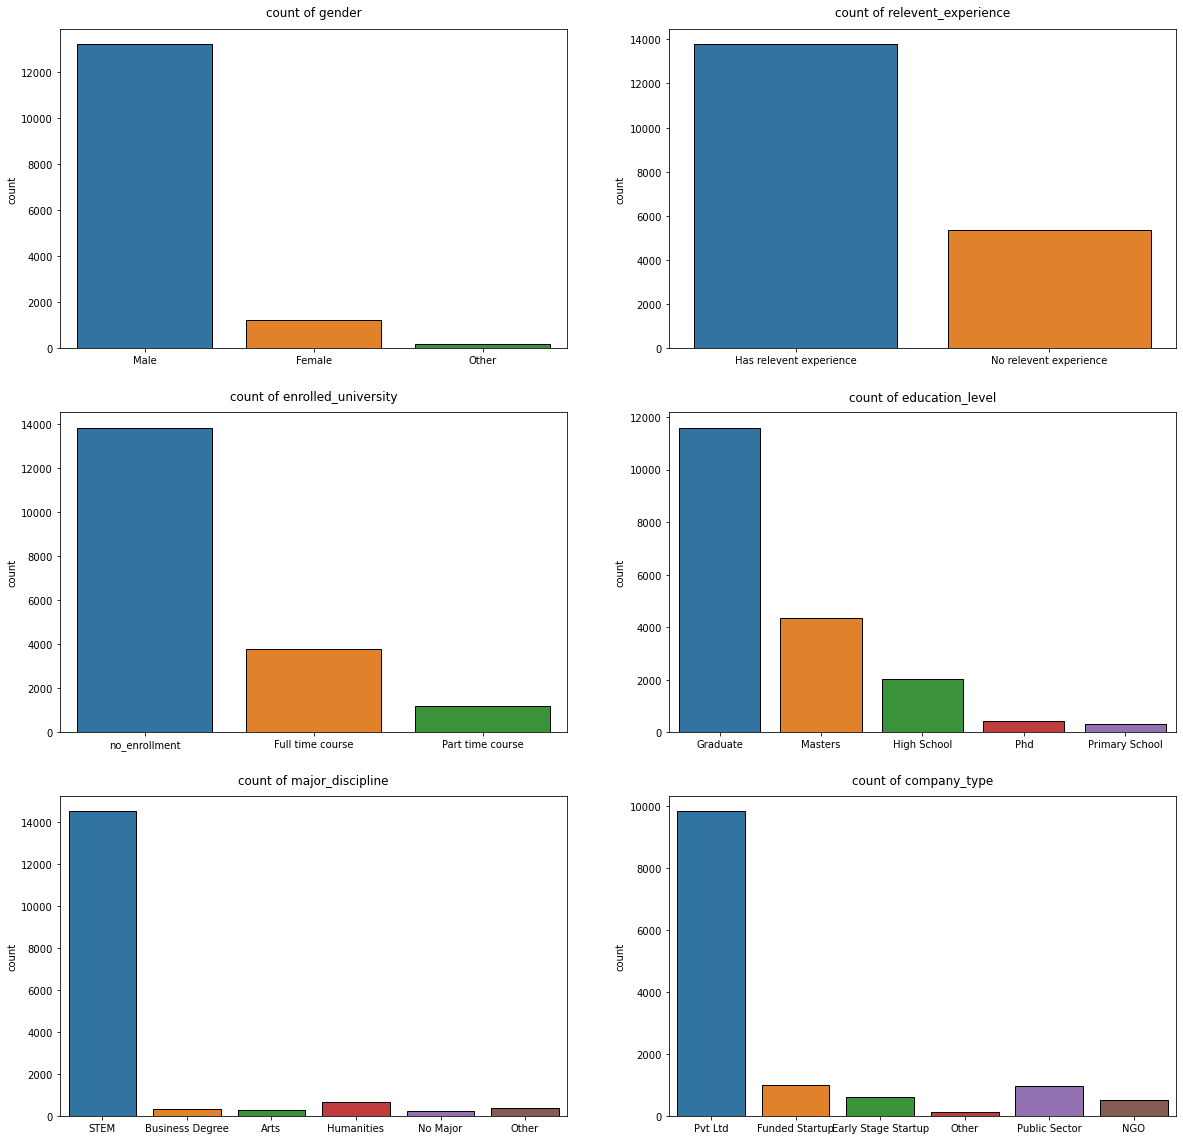

In [9]:
# create a figure using subplots with 3 rows and 2 columns
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))

# for the spines
spines_loc = ['bottom','top','left','right']

# create a countplot for each features
for i, f in enumerate(features):
    axes = fig.axes[i]
    sns.countplot(df[f],ax=axes,edgecolor='black')
    axes.set_title(f"count of {f}",position=(0.5,1.02))
    axes.set_xlabel('')

plt.tight_layout
plt.show()

The highest count from each feature :
- **gender** : male
- **relevent_experiece** : has relevent experience
- **enrolled_university** : no_enrollment
- **education_level** : graduate
- **major_discipline** : STEM
- **company_type** : Pvt Ltd

Meanwhile for the 'city','company_size' and 'last_new_job', it seems that we should do that in different ways. 'city' is obviously has a lot of unique value, so it is more wise to get the top 10 city that have highest count. It also easier to visualize the unique value at y-axis while its count at x-axis. Moreover, I will create the distribution plot for each of these features.

In [10]:
# create a dataframe that contain top 10 city with the highest data count
top_10_city = pd.DataFrame(df['city'].value_counts().head(10))
top_10_city.reset_index(inplace=True)
top_10_city.rename(columns={'index':'city','city':'count'},inplace=True)
top_10_city

,city,count
0,city_103,4355
1,city_21,2702
2,city_16,1533
3,city_114,1336
4,city_160,845
5,city_136,586
6,city_67,431
7,city_75,305
8,city_102,304
9,city_104,301


In [11]:
# import gridspec for layouting
import matplotlib.gridspec as gridspec

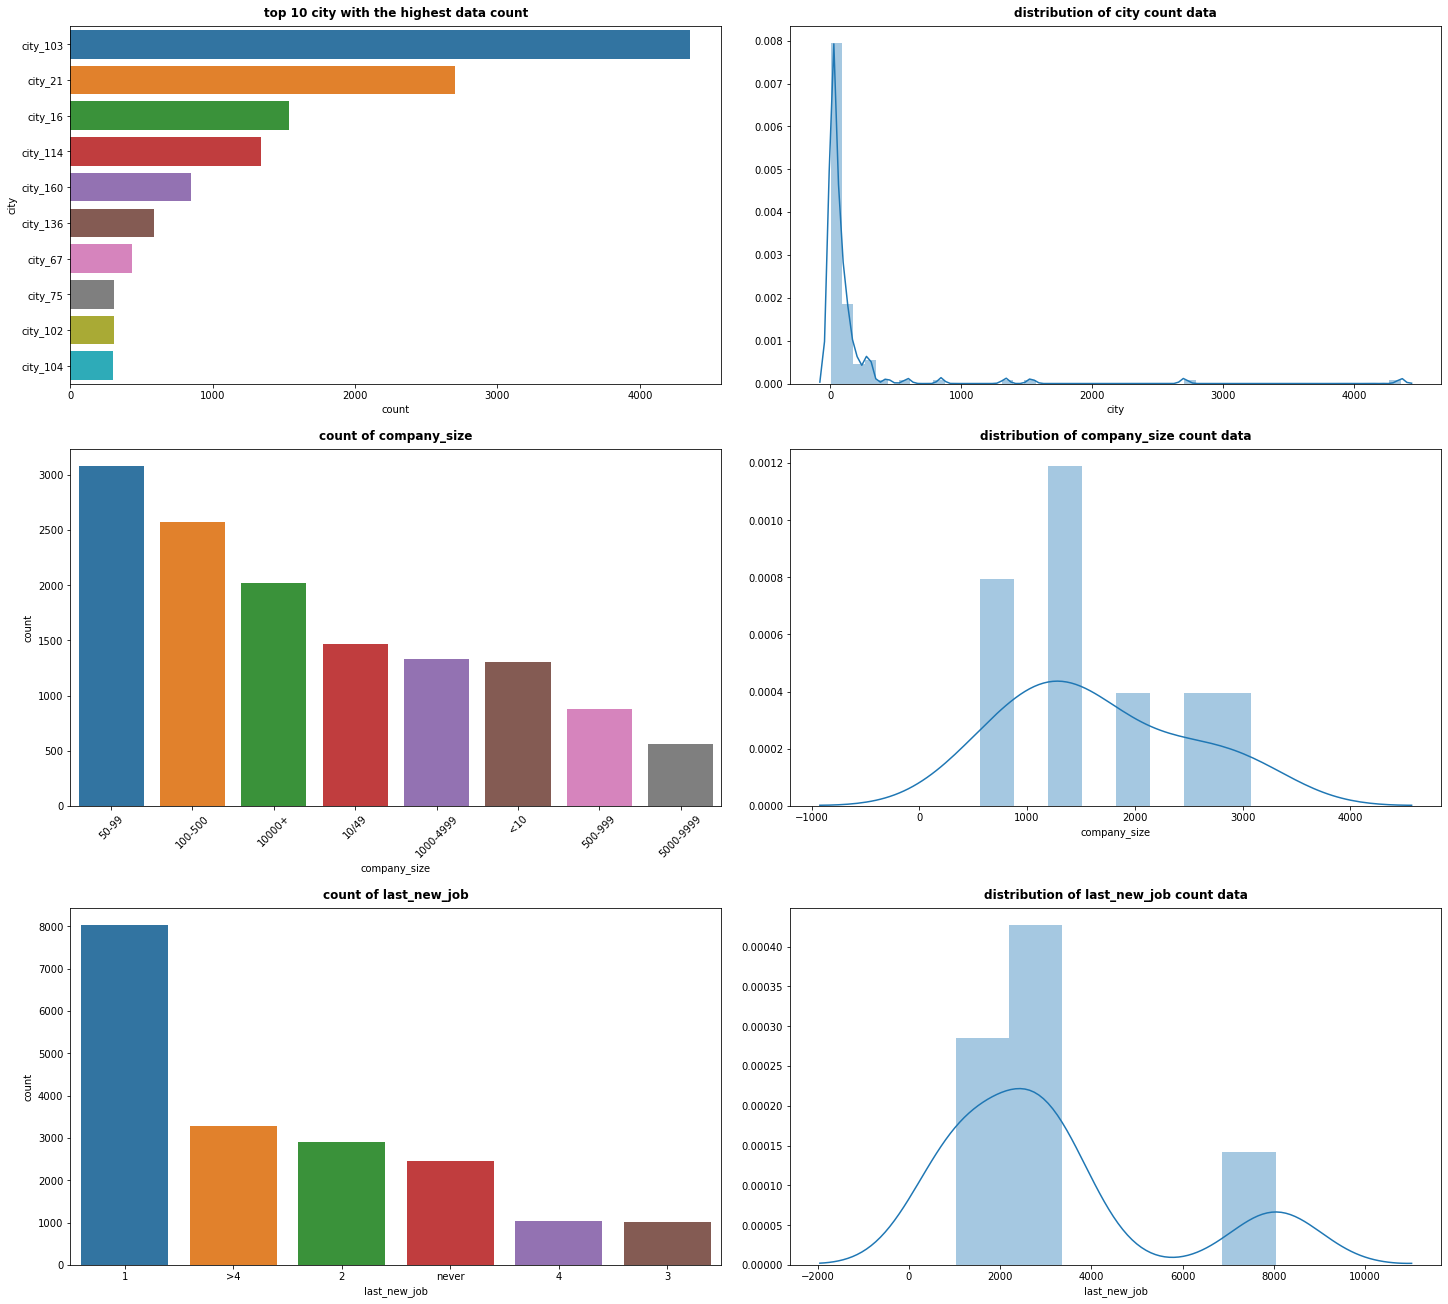

In [12]:
# visualize the count and count distribution for 'city','company_size' and 'last_new_job'
fig_2 = plt.figure(constrained_layout=True,figsize=(20,18))
gs = gridspec.GridSpec(nrows=3,ncols=2,figure=fig_2)
ax1 = fig_2.add_subplot(gs[0,0])
ax2 = fig_2.add_subplot(gs[0,1:])
ax3 = fig_2.add_subplot(gs[1,0])
ax4 = fig_2.add_subplot(gs[1,1:])
ax5 = fig_2.add_subplot(gs[2,0])
ax6 = fig_2.add_subplot(gs[2,1:])

sns.barplot(x='count',y='city',data=top_10_city,ax=ax1)
ax1.set_title('top 10 city with the highest data count',fontsize=12,fontweight='bold',position=(0.5,1.01))

sns.distplot(df['city'].value_counts(),bins=50,ax=ax2)
ax2.set_title('distribution of city count data',fontsize=12,fontweight='bold',position=(0.5,1.01))

sns.countplot(df['company_size'],order=df['company_size'].value_counts().index,ax=ax3)
ax3.set_title('count of company_size',fontsize=12,fontweight='bold',position=(0.5,1.01))
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)

sns.distplot(df['company_size'].value_counts(),bins=8,ax=ax4)
ax4.set_title('distribution of company_size count data',fontsize=12,fontweight='bold',position=(0.5,1.01))

sns.countplot(df['last_new_job'],order=df['last_new_job'].value_counts().index,ax=ax5)
ax5.set_title('count of last_new_job',fontsize=12,fontweight='bold',position=(0.5,1.01))

sns.distplot(df['last_new_job'].value_counts(),bins=6,ax=ax6)
ax6.set_title('distribution of last_new_job count data',fontsize=12,fontweight='bold',position=(0.5,1.01))


plt.show()

The highest count :
- city : city_103
- company_size : 50-99
- last_new_job : 1

Next, we should check whether our dataset is balance or imbalance by checking the count of 'targe' columns

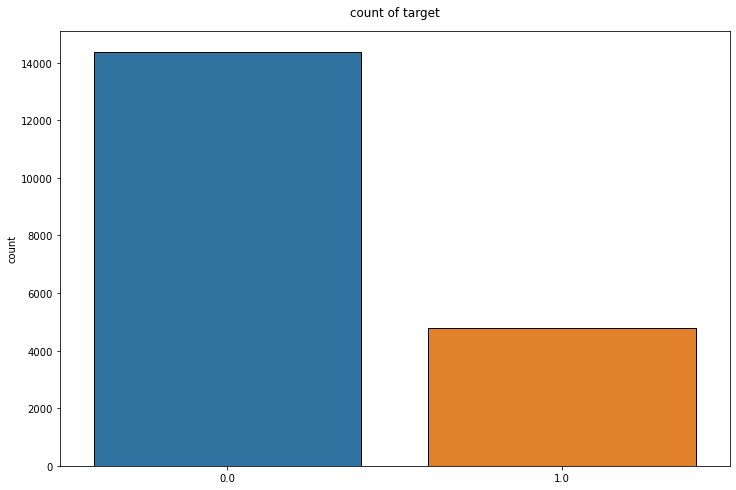

In [16]:
# check the count of the 'target' feature
figz_3, ax = plt.subplots(figsize=(12,8))
sns.countplot(df['target'],edgecolor='black',ax=ax)
ax.set_title("count of target",position=(0.5,1.02))
ax.set_xlabel('')
plt.show()

As you can see, we are dealing with imbalance data. Off course, it would effect our machine learning model later, but lets continue our EDA into numeric features which are 'city_development_index' and 'training_hours'.

First, I want to know the distribution of these features.

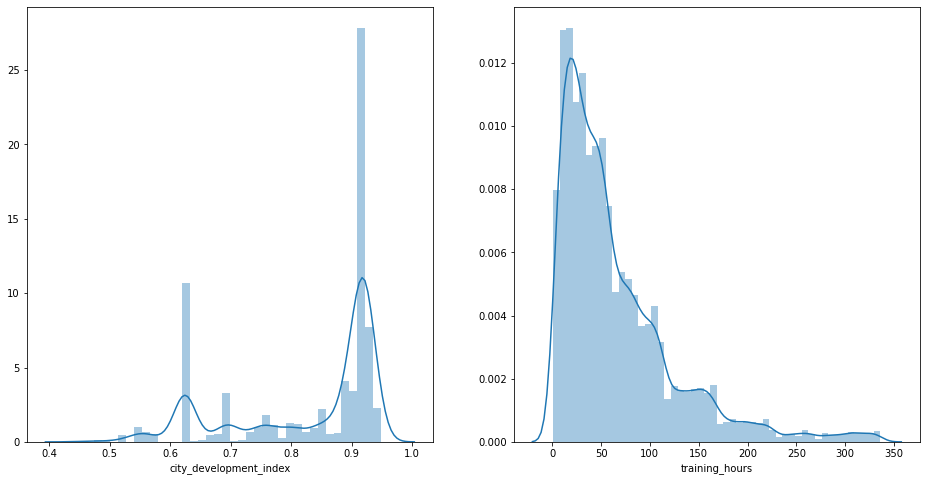

In [27]:
fig_4, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
sns.distplot(df['city_development_index'],ax=fig_4.axes[0])
sns.distplot(df['training_hours'],ax=fig_4.axes[1])
plt.show()

Hold on, lets clean the null value in the dataset before building our machine learning model.

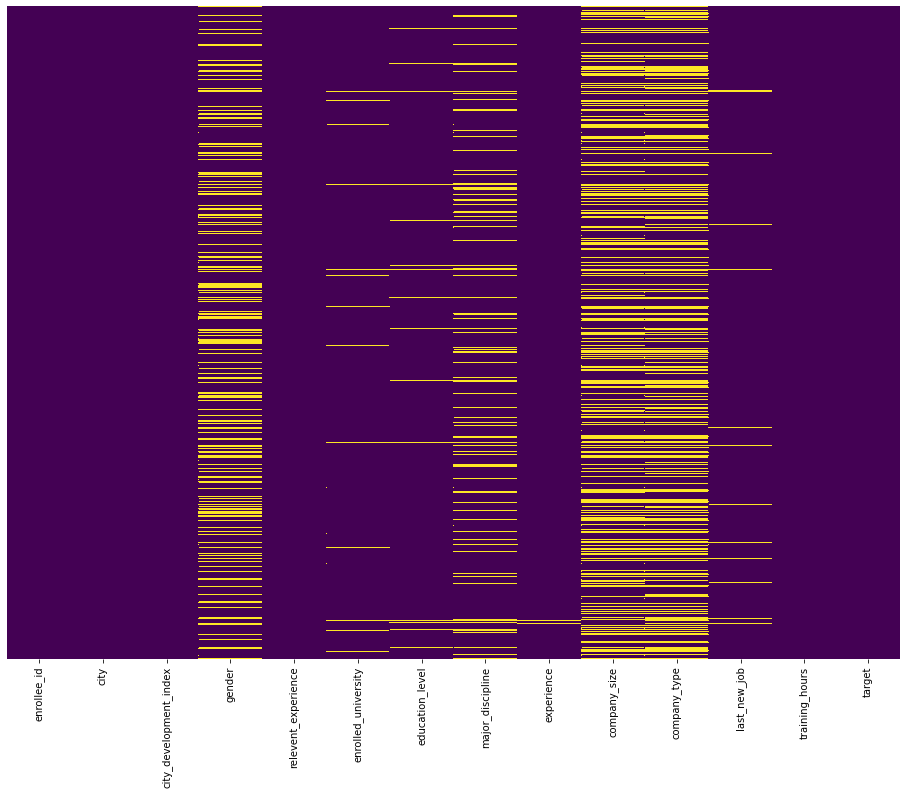

In [33]:
# check the existance of null value using heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
# calculate the null rate
for i in df.columns:
    null_rate = df[i].isnull().sum()/len(df)*100
    if null_rate > 0:
        print("{}'s null rate: {}%".format(i,round(null_rate,2)))

gender's null rate: 23.53%
enrolled_university's null rate: 2.01%
education_level's null rate: 2.4%
major_discipline's null rate: 14.68%
experience's null rate: 0.34%
company_size's null rate: 30.99%
company_type's null rate: 32.05%
last_new_job's null rate: 2.21%


Yeah, our dataset contain a lot of null value. How we deal with this kind of situation? First we must know what is the type of the feature that has null value. If it is a numeric we can simply take the mean value of the feature to fill the null value. However, if the feature is categorical, Its become tricky. Basically, I have two options :
- We can fill those null value with the highest value count of the feature if it is much greather than other value counts. For instance, we already know from our previous EDA that the majority of person is this dataset are male, so we can assign thr NaN value with 'male'
- If the value counts seems distributed normally, we can use dummy variable (e.g: 'no_data')

So, I'd fill the null value with this scenario :
- gender : 'male'
- enrolled_university : 'no_enrollment'
- education_level : 'Graduate'
- major_discipline : 'STEM'
- experience : I will drop the nan value because the amount is not significant
- company_size : 'no_data'
- company_type : 'Pvt Ltd'
- last_new_job : 'no_data'

In [35]:
# fill the null value with above scenario
df['gender'] = df['gender'].fillna('male')
df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')
df['education_level'] = df['education_level'].fillna('Graduate')
df['major_discipline'] = df['major_discipline'].fillna('STEM')
df['company_size'] = df['company_size'].fillna('no_data')
df['company_type'] = df['company_type'].fillna('Pvt Ltd')
df['last_new_job'] = df['last_new_job'].fillna('no_data')
df.dropna(inplace=True)

In [40]:
# check is there any null value left
df.isnull().values.any()

False

In [41]:
# check the head
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,no_data,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,male,No relevent experience,Full time course,Graduate,STEM,5,no_data,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,no_data,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [42]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19093 non-null  int64  
 1   city                    19093 non-null  object 
 2   city_development_index  19093 non-null  float64
 3   gender                  19093 non-null  object 
 4   relevent_experience     19093 non-null  object 
 5   enrolled_university     19093 non-null  object 
 6   education_level         19093 non-null  object 
 7   major_discipline        19093 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            19093 non-null  object 
 10  company_type            19093 non-null  object 
 11  last_new_job            19093 non-null  object 
 12  training_hours          19093 non-null  int64  
 13  target                  19093 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Then, if we want our machine learning to work, we should transform our categorical features into numberic data. I'd use pandas build in method which is pd.get_dummies().

In [44]:
# get the dummies of the categorical features
city = pd.get_dummies(df['city'],drop_first=True)
gender = pd.get_dummies(df['gender'],drop_first=True)
relevent_experience = pd.get_dummies(df['relevent_experience'],drop_first=True)
enrolled_university = pd.get_dummies(df['enrolled_university'],drop_first=True)
education_level = pd.get_dummies(df['education_level'],drop_first=True)
major_discipline = pd.get_dummies(df['major_discipline'],drop_first=True)
experience = pd.get_dummies(df['experience'],drop_first=True)
company_size = pd.get_dummies(df['company_size'],drop_first=True)
company_type = pd.get_dummies(df['company_type'],drop_first=True)
last_new_job = pd.get_dummies(df['last_new_job'],drop_first=True)

In [45]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [46]:
# drop the features that would not be required in the further calculation
df.drop(['city','gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job'],axis=1,inplace=True)

In [47]:
df = pd.concat([df,city,gender,
       relevent_experience, enrolled_university, education_level,
       major_discipline, experience, company_size, company_type,
       last_new_job],axis=1)

In [50]:
# i forget to drop the enrollee_id
df.drop(['enrollee_id'],axis=1,inplace=True)

In [51]:
df.head()

,city_development_index,training_hours,target,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,never,no_data
0,0.920,36,1.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.776,47,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.624,83,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.789,52,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.767,8,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Finally, lets build our machine learning model. I choose Logistic Regression because it is simple but the result is quite good.

First, I will split the data into train and test set, so we can evaluate the performance of our model later.

In [52]:
# import tain_test_split
from sklearn.model_selection import train_test_split

In [53]:
# seperate the features and the target
X = df.drop('target',axis=1)
y = df['target']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [55]:
# import logistic regression package
from sklearn.linear_model import LogisticRegression

In [56]:
# build and train the model
lm = LogisticRegression()
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# make the prediction
pred = lm.predict(X_test)

Next, perform some evaluation to the model.

In [58]:
# import metrics package
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      5757
         1.0       0.60      0.35      0.44      1881

    accuracy                           0.78      7638
   macro avg       0.70      0.64      0.65      7638
weighted avg       0.76      0.78      0.76      7638



Not so bad! Note that we only have small amount of record that have target value equal to 1.0. That's why we get bad result at this target value (want to leave).

# Thank You!